In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import seaborn as sns

# 设置matplotlib中文显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 数据路径
data_path = "/home/maweicheng/resgsca/database/3slice/64/nocancer"

print(f"📁 扫描目录: {data_path}")
print("=" * 60)

# 获取所有npz文件
npz_files = []
if os.path.exists(data_path):
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith('.npz'):
                npz_files.append(os.path.join(root, file))
    
    print(f"🔍 找到 {len(npz_files)} 个npz文件")
    
    # 显示前几个文件路径
    for i, file_path in enumerate(npz_files[:5]):
        relative_path = os.path.relpath(file_path, data_path)
        print(f"  {i+1}. {relative_path}")
    
    if len(npz_files) > 5:
        print(f"  ... 还有 {len(npz_files) - 5} 个文件")
        
else:
    print(f"❌ 目录不存在: {data_path}")
    npz_files = []

📁 扫描目录: /home/maweicheng/resgsca/database/3slice/64/nocancer
🔍 找到 809 个npz文件
  1. LIDC-IDRI-0040_slice034.npz
  2. LIDC-IDRI-0386_slice292.npz
  3. LIDC-IDRI-0987_slice277.npz
  4. LIDC-IDRI-0588_slice072.npz
  5. LIDC-IDRI-0673_slice430.npz
  ... 还有 804 个文件


In [2]:
# 加载和分析npz文件结构
def load_and_analyze_npz(file_path):
    """加载npz文件并分析其结构"""
    try:
        data = np.load(file_path)
        print(f"\n📄 文件: {os.path.basename(file_path)}")
        print(f"🔑 包含的keys: {list(data.keys())}")
        
        # 分析每个key的数据
        for key in data.keys():
            arr = data[key]
            print(f"  📊 {key}: 形状={arr.shape}, 数据类型={arr.dtype}")
            print(f"      值范围: [{arr.min():.3f}, {arr.max():.3f}], 均值={arr.mean():.3f}")
        
        return data
    except Exception as e:
        print(f"❌ 加载失败 {file_path}: {e}")
        return None

# 分析前几个文件
if npz_files:
    print("\n" + "="*60)
    print("📊 数据结构分析")
    print("="*60)
    
    # 分析前3个文件
    sample_files = npz_files[:3]
    sample_data = []
    
    for file_path in sample_files:
        data = load_and_analyze_npz(file_path)
        if data is not None:
            sample_data.append(data)
            
    print(f"\n✅ 成功加载 {len(sample_data)} 个样本文件")
else:
    print("⚠️ 没有找到npz文件")


📊 数据结构分析

📄 文件: LIDC-IDRI-0040_slice034.npz
🔑 包含的keys: ['data', 'mask']
  📊 data: 形状=(64, 64, 3), 数据类型=uint8
      值范围: [23.000, 255.000], 均值=112.101
  📊 mask: 形状=(64, 64), 数据类型=uint8
      值范围: [0.000, 1.000], 均值=0.006

📄 文件: LIDC-IDRI-0386_slice292.npz
🔑 包含的keys: ['data', 'mask']
  📊 data: 形状=(64, 64, 3), 数据类型=uint8
      值范围: [0.000, 255.000], 均值=73.857
  📊 mask: 形状=(64, 64), 数据类型=uint8
      值范围: [0.000, 1.000], 均值=0.006

📄 文件: LIDC-IDRI-0987_slice277.npz
🔑 包含的keys: ['data', 'mask']
  📊 data: 形状=(64, 64, 3), 数据类型=uint8
      值范围: [5.000, 235.000], 均值=43.018
  📊 mask: 形状=(64, 64), 数据类型=uint8
      值范围: [0.000, 1.000], 均值=0.006

✅ 成功加载 3 个样本文件



🎨 肺结节数据可视化

🖼️ 样本 1:
🎯 使用key 'data' 作为图像数据: (64, 64, 3)


/tmp/ipykernel_3225251/93558657.py:71: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3225251/93558657.py:71: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3225251/93558657.py:71: UserWarning: Glyph 20999 (\N{CJK UNIFIED IDEOGRAPH-5207}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3225251/93558657.py:71: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3225251/93558657.py:71: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3225251/93558657.py:71: UserWarning: Glyph 29366 (\N{CJK UNIFIED IDEOGRAPH-72B6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3225251/93558657.py:71: UserWarning: Glyph 33539 (\N{CJK UNIFIED IDEOGRAP

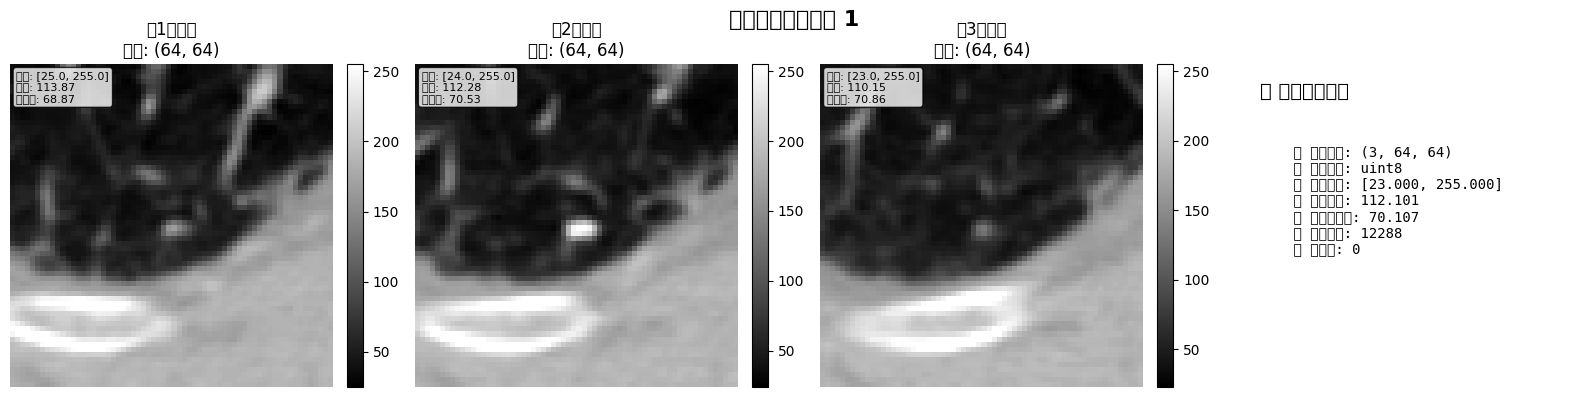


🖼️ 样本 2:
🎯 使用key 'data' 作为图像数据: (64, 64, 3)


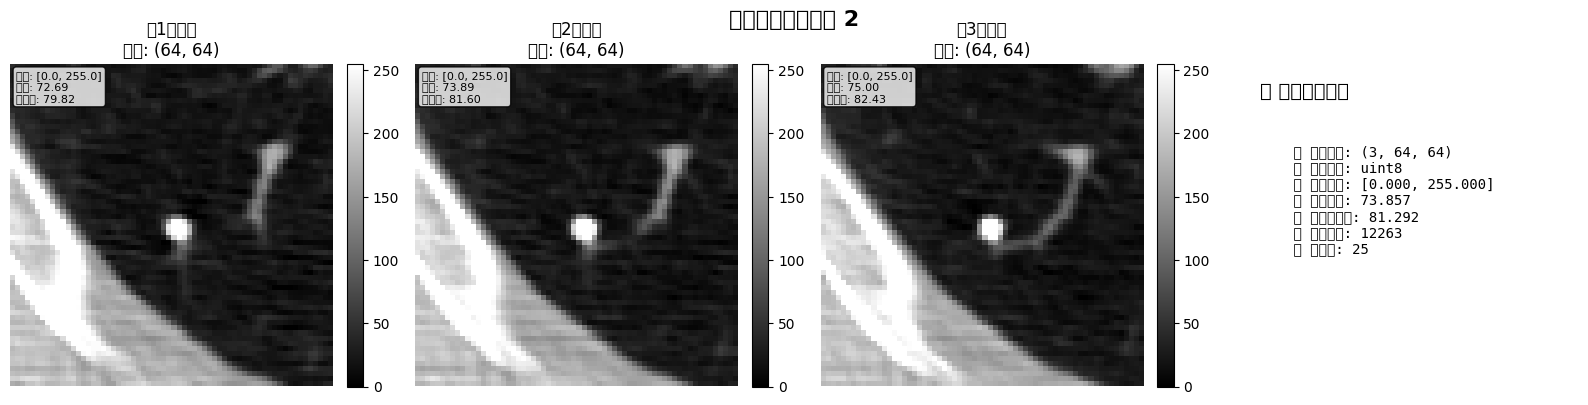

In [3]:
# 可视化肺结节数据
def visualize_lung_nodule(data_dict, title="肺结节可视化"):
    """可视化三层64x64的肺结节数据"""
    
    # 尝试不同可能的key名称
    possible_keys = ['image', 'data', 'nodule', 'ct', 'volume']
    image_data = None
    
    for key in data_dict.keys():
        arr = data_dict[key]
        # 寻找形状为 (3, 64, 64) 或 (64, 64, 3) 的数据
        if arr.shape in [(3, 64, 64), (64, 64, 3)]:
            image_data = arr
            print(f"🎯 使用key '{key}' 作为图像数据: {arr.shape}")
            break
        # 或者寻找接近这个形状的数据
        elif len(arr.shape) == 3 and 64 in arr.shape:
            image_data = arr
            print(f"🎯 使用key '{key}' 作为图像数据: {arr.shape}")
            break
    
    if image_data is None:
        print("❌ 未找到合适的图像数据")
        return
    
    # 确保数据形状为 (3, 64, 64)
    if image_data.shape == (64, 64, 3):
        image_data = image_data.transpose(2, 0, 1)
    
    # 创建子图
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    
    # 显示三个切片
    for i in range(3):
        slice_data = image_data[i]
        im = axes[i].imshow(slice_data, cmap='gray', aspect='equal')
        axes[i].set_title(f'第{i+1}层切片\n形状: {slice_data.shape}')
        axes[i].axis('off')
        
        # 添加颜色条
        plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
        
        # 显示统计信息
        axes[i].text(0.02, 0.98, 
                    f'范围: [{slice_data.min():.1f}, {slice_data.max():.1f}]\n'
                    f'均值: {slice_data.mean():.2f}\n'
                    f'标准差: {slice_data.std():.2f}',
                    transform=axes[i].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                    fontsize=8)
    
    # 第四个子图：整体统计
    axes[3].axis('off')
    axes[3].text(0.1, 0.9, '📊 整体统计信息', fontsize=14, weight='bold')
    
    stats_text = f"""
    🔸 数据形状: {image_data.shape}
    🔸 数据类型: {image_data.dtype}
    🔸 总体范围: [{image_data.min():.3f}, {image_data.max():.3f}]
    🔸 总体均值: {image_data.mean():.3f}
    🔸 总体标准差: {image_data.std():.3f}
    🔸 非零像素: {np.count_nonzero(image_data)}
    🔸 零像素: {np.sum(image_data == 0)}
    """
    
    axes[3].text(0.1, 0.8, stats_text, fontsize=10, 
                verticalalignment='top', family='monospace')
    
    plt.suptitle(title, fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()
    
    return image_data

# 可视化样本数据
if sample_data:
    print("\n" + "="*60)
    print("🎨 肺结节数据可视化")
    print("="*60)
    
    for i, data in enumerate(sample_data[:2]):  # 只显示前2个样本
        print(f"\n🖼️ 样本 {i+1}:")
        visualize_lung_nodule(data, f"无癌症肺结节样本 {i+1}")
else:
    print("⚠️ 没有可用的样本数据进行可视化")


📈 批量分析 (最多20个样本)
✅  1. LIDC-IDRI-0040_slice034.npz    | 形状: (3, 64, 64)  | 范围: [23.00, 255.00] | 均值: 112.101
✅  2. LIDC-IDRI-0386_slice292.npz    | 形状: (3, 64, 64)  | 范围: [0.00, 255.00] | 均值: 73.857
✅  3. LIDC-IDRI-0987_slice277.npz    | 形状: (3, 64, 64)  | 范围: [5.00, 235.00] | 均值: 43.018
✅  4. LIDC-IDRI-0588_slice072.npz    | 形状: (3, 64, 64)  | 范围: [0.00, 255.00] | 均值: 50.058
✅  5. LIDC-IDRI-0673_slice430.npz    | 形状: (3, 64, 64)  | 范围: [0.00, 255.00] | 均值: 113.523
✅  6. LIDC-IDRI-0854_slice237.npz    | 形状: (3, 64, 64)  | 范围: [2.00, 255.00] | 均值: 86.724
✅  7. LIDC-IDRI-0427_slice224.npz    | 形状: (3, 64, 64)  | 范围: [0.00, 187.00] | 均值: 26.234
✅  8. LIDC-IDRI-0491_slice424.npz    | 形状: (3, 64, 64)  | 范围: [0.00, 255.00] | 均值: 31.492
✅  9. LIDC-IDRI-0707_slice076.npz    | 形状: (3, 64, 64)  | 范围: [4.00, 255.00] | 均值: 47.914
✅ 10. LIDC-IDRI-0980_slice045.npz    | 形状: (3, 64, 64)  | 范围: [18.00, 255.00] | 均值: 109.757
✅ 11. LIDC-IDRI-0702_slice393.npz    | 形状: (3, 64, 64)  | 范围: [5.00, 255.00] 

/tmp/ipykernel_3225251/2412839162.py:91: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3225251/2412839162.py:91: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3225251/2412839162.py:91: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3225251/2412839162.py:91: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3225251/2412839162.py:91: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3225251/2412839162.py:91: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3225251/2412839162.py:91: UserWarning: Glyph 24067 (\N{CJK UN

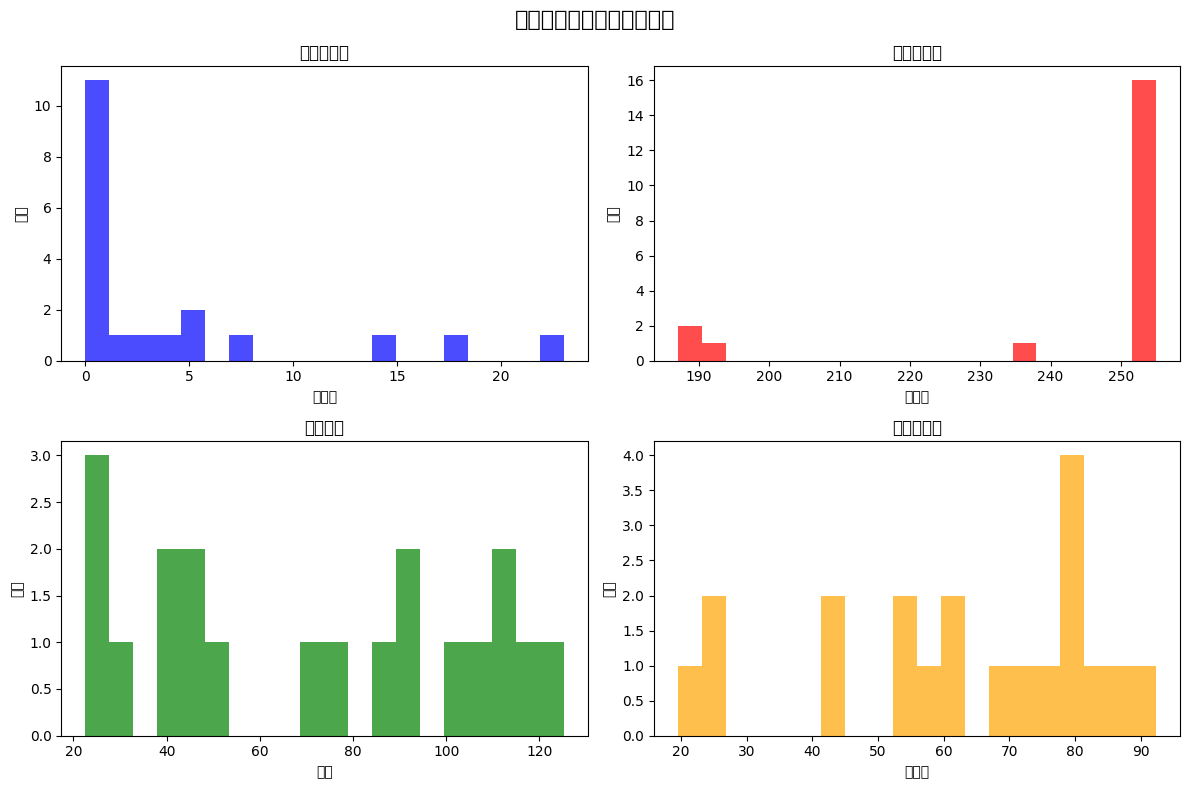


📊 总体统计摘要 (20 个有效样本)
----------------------------------------
最小值范围: [0.000, 23.000]
最大值范围: [187.000, 255.000]
均值范围: [22.534, 125.175]
标准差范围: [19.490, 92.361]


In [4]:
# 批量数据统计分析
def batch_analysis(npz_files, max_samples=10):
    """批量分析多个npz文件的统计信息"""
    
    print(f"\n📈 批量分析 (最多{max_samples}个样本)")
    print("="*60)
    
    stats_summary = {
        'shapes': [],
        'dtypes': [],
        'min_vals': [],
        'max_vals': [],
        'mean_vals': [],
        'std_vals': [],
        'file_names': []
    }
    
    for i, file_path in enumerate(npz_files[:max_samples]):
        try:
            data = np.load(file_path)
            file_name = os.path.basename(file_path)
            
            # 寻找图像数据
            image_data = None
            for key in data.keys():
                arr = data[key]
                if arr.shape in [(3, 64, 64), (64, 64, 3)] or (len(arr.shape) == 3 and 64 in arr.shape):
                    image_data = arr
                    break
            
            if image_data is not None:
                # 标准化形状
                if image_data.shape == (64, 64, 3):
                    image_data = image_data.transpose(2, 0, 1)
                
                stats_summary['file_names'].append(file_name)
                stats_summary['shapes'].append(str(image_data.shape))
                stats_summary['dtypes'].append(str(image_data.dtype))
                stats_summary['min_vals'].append(image_data.min())
                stats_summary['max_vals'].append(image_data.max())
                stats_summary['mean_vals'].append(image_data.mean())
                stats_summary['std_vals'].append(image_data.std())
                
                print(f"✅ {i+1:2d}. {file_name[:30]:<30} | "
                      f"形状: {str(image_data.shape):<12} | "
                      f"范围: [{image_data.min():.2f}, {image_data.max():.2f}] | "
                      f"均值: {image_data.mean():.3f}")
            else:
                print(f"❌ {i+1:2d}. {file_name[:30]:<30} | 未找到合适的图像数据")
                
        except Exception as e:
            print(f"❌ {i+1:2d}. 加载失败: {e}")
    
    return stats_summary

# 数据分布可视化
def plot_statistics(stats_summary):
    """绘制数据统计分布图"""
    
    if not stats_summary['min_vals']:
        print("⚠️ 没有有效数据进行统计")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # 最小值分布
    axes[0, 0].hist(stats_summary['min_vals'], bins=20, alpha=0.7, color='blue')
    axes[0, 0].set_title('最小值分布')
    axes[0, 0].set_xlabel('最小值')
    axes[0, 0].set_ylabel('频次')
    
    # 最大值分布
    axes[0, 1].hist(stats_summary['max_vals'], bins=20, alpha=0.7, color='red')
    axes[0, 1].set_title('最大值分布')
    axes[0, 1].set_xlabel('最大值')
    axes[0, 1].set_ylabel('频次')
    
    # 均值分布
    axes[1, 0].hist(stats_summary['mean_vals'], bins=20, alpha=0.7, color='green')
    axes[1, 0].set_title('均值分布')
    axes[1, 0].set_xlabel('均值')
    axes[1, 0].set_ylabel('频次')
    
    # 标准差分布
    axes[1, 1].hist(stats_summary['std_vals'], bins=20, alpha=0.7, color='orange')
    axes[1, 1].set_title('标准差分布')
    axes[1, 1].set_xlabel('标准差')
    axes[1, 1].set_ylabel('频次')
    
    plt.suptitle('无癌症肺结节数据统计分布', fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()
    
    # 打印总体统计
    print(f"\n📊 总体统计摘要 ({len(stats_summary['min_vals'])} 个有效样本)")
    print("-" * 40)
    print(f"最小值范围: [{min(stats_summary['min_vals']):.3f}, {max(stats_summary['min_vals']):.3f}]")
    print(f"最大值范围: [{min(stats_summary['max_vals']):.3f}, {max(stats_summary['max_vals']):.3f}]")
    print(f"均值范围: [{min(stats_summary['mean_vals']):.3f}, {max(stats_summary['mean_vals']):.3f}]")
    print(f"标准差范围: [{min(stats_summary['std_vals']):.3f}, {max(stats_summary['std_vals']):.3f}]")

# 执行批量分析
if npz_files:
    stats = batch_analysis(npz_files, max_samples=20)
    
    print("\n" + "="*60)
    print("📊 统计分布可视化")
    print("="*60)
    plot_statistics(stats)
else:
    print("⚠️ 没有npz文件可供分析")